# Doğrusal Olmayan Regreson Modelleri

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [ ]:
import pandas as pd
#import datetime

data = pd.read_excel('/content/drive/MyDrive/daily.xlsx')
data=data.dropna()
data


,radiation,max_hum,min_hum,relative_hum,temp,max_temp,min_temp,dew_point,wind_mag,sun_dur,zenith,ws,max_sun_dur,min_sun_dur
0,1230.0,87.555556,84.555556,86.444444,-3.255556,-2.8,-3.8,-5.188889,0.722222,0.000000,1.064067,1.227844,0.0,0.0
1,2030.0,60.111111,54.111111,59.222222,-5.188889,-4.0,-7.2,-14.444444,1.233333,0.855556,1.065916,1.229248,1.0,0.0
2,1260.0,26.444444,22.777778,26.111111,-3.500000,-2.8,-5.2,-4.588889,0.500000,0.122222,1.067920,1.230766,0.6,0.0
3,2380.0,70.555556,60.444444,65.555556,-5.733333,-0.4,-11.9,4.777778,0.900000,0.111111,1.070076,1.232398,0.6,0.0
4,1340.0,33.333333,23.666667,30.333333,6.366667,7.9,4.3,2.644444,2.066667,0.200000,1.072386,1.234143,0.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,510.0,80.888889,75.888889,80.000000,3.688889,4.6,2.3,-0.588889,2.811111,0.000000,1.057155,1.222583,0.0,0.0
1091,640.0,81.777778,77.777778,79.222222,2.666667,3.7,1.4,0.650000,0.611111,0.000000,1.058224,1.223399,0.0,0.0
1092,590.0,89.125000,87.375000,89.125000,2.300000,2.8,0.9,0.177778,0.625000,0.000000,1.059450,1.224333,0.0,0.0
1093,760.0,69.111111,60.777778,66.222222,6.122222,8.9,4.2,1.160000,2.844444,0.000000,1.060833,1.225386,0.0,0.0


In [ ]:
from sklearn import preprocessing
scaler1 = preprocessing.MinMaxScaler(feature_range=(1,10))
scaler2 = preprocessing.MinMaxScaler(feature_range=(1,3))
scaler3 = preprocessing.MinMaxScaler(feature_range=(1,3))
scaler4 = preprocessing.MinMaxScaler(feature_range=(0,1))
scaler5 = preprocessing.MinMaxScaler(feature_range=(1,2))
data.iloc[:,0:1]=scaler1.fit_transform(data.iloc[:,0:1])
data.iloc[:,1:4]=scaler2.fit_transform(data.iloc[:,1:4])
data.iloc[:,8:9]=scaler5.fit_transform(data.iloc[:,8:9])
data.iloc[:,9:14]=scaler4.fit_transform(data.iloc[:,9:14])

In [ ]:
y = data["radiation"]
X = data.drop(["radiation"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=200)

In [ ]:
data

,radiation,max_hum,min_hum,relative_hum,temp,max_temp,min_temp,dew_point,wind_mag,sun_dur,zenith,ws,max_sun_dur,min_sun_dur
0,2.039274,2.811136,2.749504,2.773108,-3.255556,-2.8,-3.8,-5.188889,1.057050,0.000000,0.009682,0.010874,0.0,0.0
1,2.850904,2.134358,2.024293,2.111904,-5.188889,-4.0,-7.2,-14.444444,1.132029,0.855556,0.011471,0.012875,1.0,0.0
2,2.069710,1.304139,1.277909,1.307663,-3.500000,-2.8,-5.2,-4.588889,1.024450,0.122222,0.013410,0.015040,0.6,0.0
3,3.205992,2.391917,2.175158,2.265735,-5.733333,-0.4,-11.9,4.777778,1.083130,0.111111,0.015497,0.017368,0.6,0.0
4,2.150873,1.474019,1.299083,1.410217,6.366667,7.9,4.3,2.644444,1.254279,0.200000,0.017731,0.019856,0.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1.308807,2.646736,2.543057,2.616578,3.688889,4.6,2.3,-0.588889,1.363488,0.000000,0.002994,0.003370,0.0,0.0
1091,1.440697,2.668656,2.588052,2.597687,2.666667,3.7,1.4,0.650000,1.040750,0.000000,0.004028,0.004533,0.0,0.0
1092,1.389970,2.849839,2.816665,2.838217,2.300000,2.8,0.9,0.177778,1.042787,0.000000,0.005215,0.005866,0.0,0.0
1093,1.562441,2.356297,2.183099,2.281928,6.122222,8.9,4.2,1.160000,1.368378,0.000000,0.006553,0.007368,0.0,0.0


In [ ]:
X_train

,max_hum,min_hum,relative_hum,temp,max_temp,min_temp,dew_point,wind_mag,sun_dur,zenith,ws,max_sun_dur,min_sun_dur
671,1.976260,1.826316,1.931624,14.388889,18.4,8.9,6.560000,1.117359,0.910000,0.162823,0.174140,1.0,0.0
945,2.355201,2.113754,2.257099,25.975000,31.7,16.6,3.180000,1.279951,0.226667,0.861757,0.851103,1.0,0.0
820,1.800470,1.657529,1.717880,9.600000,9.6,3.2,-4.007143,1.189820,0.592857,0.584255,0.579337,0.4,0.0
123,1.263235,1.210039,1.216482,17.400000,21.3,10.3,-5.607143,1.281174,0.550000,0.833995,0.822614,1.0,0.0
970,1.583814,1.521410,1.587759,27.527273,30.3,22.4,8.671429,1.260502,0.764286,0.686110,0.676417,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2.397397,2.262501,2.360193,6.466667,13.4,3.0,1.033333,1.081500,0.800000,0.005865,0.006596,1.0,0.0
852,1.682807,1.581756,1.656347,16.416667,17.3,6.1,-1.320000,1.123472,0.580000,0.827559,0.816065,1.0,0.0
818,2.506801,2.423197,2.470843,4.281818,7.6,0.5,-0.928571,1.139142,0.050000,0.567514,0.563533,0.1,0.0
792,2.012428,1.831080,1.997205,10.920000,12.2,4.5,3.916667,1.162347,0.916667,0.349870,0.358106,1.0,0.0


In [ ]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knn_model.n_neighbors

5

In [ ]:
knn_model.effective_metric_

'euclidean'

## Tahmin

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.4384931243794552

In [ ]:
import numpy as np
RMSE = [] 
MYRHO = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    my_rho = np.corrcoef(y_train, y_pred)
    RMSE.append(rmse) 
    MYRHO.append(my_rho)
    
    #print("k =" , k , "için RMSE değeri: ", rmse)
    print("k =" , k , "için R değeri: ", my_rho)

k = 1 için R değeri:  [[1. 1.]
 [1. 1.]]
k = 2 için R değeri:  [[1.         0.93761296]
 [0.93761296 1.        ]]
k = 3 için R değeri:  [[1.         0.91393802]
 [0.91393802 1.        ]]
k = 4 için R değeri:  [[1.         0.89940301]
 [0.89940301 1.        ]]
k = 5 için R değeri:  [[1.         0.89210293]
 [0.89210293 1.        ]]
k = 6 için R değeri:  [[1.         0.88514875]
 [0.88514875 1.        ]]
k = 7 için R değeri:  [[1.         0.88300911]
 [0.88300911 1.        ]]
k = 8 için R değeri:  [[1.        0.8803369]
 [0.8803369 1.       ]]
k = 9 için R değeri:  [[1.         0.87937898]
 [0.87937898 1.        ]]
k = 10 için R değeri:  [[1.        0.8762752]
 [0.8762752 1.       ]]


## Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [ ]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_cv_model.best_params_["n_neighbors"]

11

In [ ]:
RMSE = [] 
RMSE_CV = []
for k in range(30):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k=",k, "için RMSE_CV değeri: ", rmse_cv )


k= 1 için RMSE_CV değeri:  1.6710838823449066
k= 2 için RMSE_CV değeri:  1.468607543210163
k= 3 için RMSE_CV değeri:  1.3777078927018918
k= 4 için RMSE_CV değeri:  1.3427682847313676
k= 5 için RMSE_CV değeri:  1.3143117014533086
k= 6 için RMSE_CV değeri:  1.297987691181412
k= 7 için RMSE_CV değeri:  1.287791316128394
k= 8 için RMSE_CV değeri:  1.276901744033135
k= 9 için RMSE_CV değeri:  1.2721666311243562
k= 10 için RMSE_CV değeri:  1.2720470333065932
k= 11 için RMSE_CV değeri:  1.2698384376741991
k= 12 için RMSE_CV değeri:  1.2773740140500411
k= 13 için RMSE_CV değeri:  1.2784136975547689
k= 14 için RMSE_CV değeri:  1.273954621587463
k= 15 için RMSE_CV değeri:  1.2819636631407585
k= 16 için RMSE_CV değeri:  1.2861868026300787
k= 17 için RMSE_CV değeri:  1.2896802383595485
k= 18 için RMSE_CV değeri:  1.2903712941995384
k= 19 için RMSE_CV değeri:  1.2954287703814182
k= 20 için RMSE_CV değeri:  1.3001247622633578
k= 21 için RMSE_CV değeri:  1.301536361736242
k= 22 için RMSE_CV değeri:  

In [ ]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [ ]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [ ]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

1.4236525136916403

In [ ]:
len(y_pred)

809

In [ ]:
len(y_test)

270

In [ ]:
mape = np.mean(np.abs((y_test - knn_tuned.predict(X_test))/y_test))*100
mape

27.88511763630655

In [ ]:
rmspe = np.sqrt(np.mean(np.square(((y_test - knn_tuned.predict(X_test)) / y_test)), axis=0))*100
rmspe

44.19433831400048

In [ ]:
Y_train_knn = scaler1.inverse_transform([y_train])

Y_test_knn = scaler1.inverse_transform([y_test])

Y_pred_knn= scaler1.inverse_transform([y_pred])

In [ ]:
Y_pred_knn_duz

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808
0,3554.326833,7040.122111,3369.777333,5336.842056,7363.287778,6110.073111,4917.5095,7299.333333,5997.570389,6680.761222,6226.283611,3661.924833,2356.9195,6987.385278,3595.8145,6146.4125,1695.777778,1565.405944,1868.909778,5899.507389,2216.150167,7330.280278,7633.6635,4226.487333,1528.687833,3401.811333,4884.023722,2723.017,4076.113722,6690.672667,4166.995556,1616.202111,3134.2405,6768.309056,3358.1625,6909.436389,2734.968833,2627.389556,2691.356278,6271.128278,...,5253.021556,2922.923,6974.365611,1897.090444,7164.521167,3366.702222,1844.904722,7343.217389,2691.541778,2695.693889,3540.789056,7247.496389,5774.761278,7348.646444,3661.564278,3689.767222,7100.328389,7242.590056,7320.967444,6228.309722,6449.654389,3088.792556,3392.577722,4906.094833,6104.975333,4550.064333,7461.814389,4855.736167,3068.021833,2175.083167,6529.107333,3064.582722,7645.038944,7313.402944,6790.248944,2288.023389,5047.543833,2182.765611,2892.291944,5889.544722


In [ ]:
Y_pred_knn_duz= pd.DataFrame(Y_pred_knn)
Y_pred_knn_duz.to_excel("/content/drive/MyDrive/pred_duz_knn.xlsx")

In [ ]:
y_pred_knn= pd.DataFrame(y_pred)
y_pred_knn.to_excel("/content/drive/MyDrive/y_pred_knn.xlsx")

In [ ]:
tahmin= scaler1.inverse_transform([knn_tuned.predict(X_test)])

In [ ]:
Y_test

array([[5120.        , 2590.        , 1850.        , 7670.        ,
        5970.        , 4670.        , 7856.795     , 8480.        ,
        4730.        , 6350.40833333, 3030.        , 1920.27333333,
        3890.        , 8540.        , 1730.        , 4490.        ,
        8825.58666667, 2600.        , 7230.        , 1770.        ,
        7970.        , 6330.71      , 6801.14833333, 7620.        ,
        6734.14166667, 6780.        , 3070.        , 8342.02166667,
        7753.38      , 3231.01166667, 1380.        , 5420.        ,
        4140.        ,  890.        ,  920.        , 3300.        ,
        3540.        , 5690.        , 1330.        , 2850.        ,
        1880.        , 6800.        , 8137.015     , 4210.        ,
        8138.63833333,  550.        , 4940.        , 3690.        ,
        8655.30166667, 7932.98333333, 6240.        , 6510.        ,
        8180.        , 7565.33166667, 8330.        , 3510.        ,
        6650.        , 4170.        ,  620.     

No handles with labels found to put in legend.


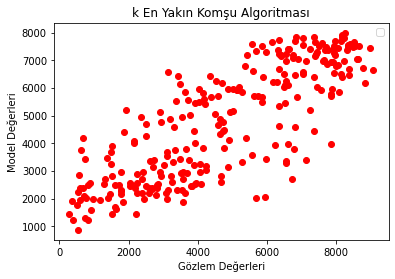

In [ ]:
plt.scatter(Y_test_knn,tahmin, color="r")
plt.xlabel("Gözlem Değerleri")
plt.ylabel("Model Değerleri")
plt.title("k En Yakın Komşu Algoritması")
plt.legend()
plt.show()

# Random Forests

In [ ]:
data

,radiation,max_hum,min_hum,relative_hum,temp,max_temp,min_temp,dew_point,wind_mag,sun_dur,zenith,ws,max_sun_dur,min_sun_dur
0,2.039274,2.811136,2.749504,2.773108,-3.255556,-2.8,-3.8,-5.188889,1.057050,0.000000,0.009682,0.010874,0.0,0.0
1,2.850904,2.134358,2.024293,2.111904,-5.188889,-4.0,-7.2,-14.444444,1.132029,0.855556,0.011471,0.012875,1.0,0.0
2,2.069710,1.304139,1.277909,1.307663,-3.500000,-2.8,-5.2,-4.588889,1.024450,0.122222,0.013410,0.015040,0.6,0.0
3,3.205992,2.391917,2.175158,2.265735,-5.733333,-0.4,-11.9,4.777778,1.083130,0.111111,0.015497,0.017368,0.6,0.0
4,2.150873,1.474019,1.299083,1.410217,6.366667,7.9,4.3,2.644444,1.254279,0.200000,0.017731,0.019856,0.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1.308807,2.646736,2.543057,2.616578,3.688889,4.6,2.3,-0.588889,1.363488,0.000000,0.002994,0.003370,0.0,0.0
1091,1.440697,2.668656,2.588052,2.597687,2.666667,3.7,1.4,0.650000,1.040750,0.000000,0.004028,0.004533,0.0,0.0
1092,1.389970,2.849839,2.816665,2.838217,2.300000,2.8,0.9,0.177778,1.042787,0.000000,0.005215,0.005866,0.0,0.0
1093,1.562441,2.356297,2.183099,2.281928,6.122222,8.9,4.2,1.160000,1.368378,0.000000,0.006553,0.007368,0.0,0.0


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/daily.xlsx')

data=data.dropna()

In [ ]:
data

,radiation,ws
0,1230.0,1.227844
1,2030.0,1.229248
2,1260.0,1.230766
3,2380.0,1.232398
4,1340.0,1.234143
...,...,...
1090,510.0,1.222583
1091,640.0,1.223399
1092,590.0,1.224333
1093,760.0,1.225386


In [ ]:
y = data["radiation"]
X = data.drop(["radiation"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=200)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state = 42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(X_train)

In [ ]:
mape = np.mean(np.abs((y_test - y_pred)/y_test)) *100
mape

ValueError: ignored

In [ ]:
rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / y_test)), axis=0))*100
rmspe

ValueError: ignored

In [ ]:
my_rho = np.corrcoef(y_train, y_pred)
my_rho

array([[1.       , 0.9904379],
       [0.9904379, 1.       ]])

## Model Tuning

In [ ]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [0.25,0.75,0.80,0.60],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [ ]:
rf_model = RandomForestRegressor(random_state = 42)

In [ ]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [ ]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [ ]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 0.8, 'n_estimators': 500}

In [ ]:
rf_tuned = RandomForestRegressor(max_depth  = 9, 
                                 max_features = 0.8, 
                                 n_estimators =500)

In [ ]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=0.8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / y_test)), axis=0))*100
rmspe

66.76201718695907

In [ ]:
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
mape

26.925842407629442

In [ ]:
my_rho = np.corrcoef(y_test, y_pred)
my_rho

array([[1.        , 0.93427392],
       [0.93427392, 1.        ]])

In [ ]:
Importance = pd.DataFrame({"Önem Düzeyi": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

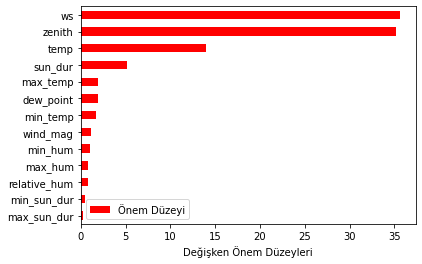

In [ ]:
Importance.sort_values(by = "Önem Düzeyi", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [ ]:
Y_train_rf = scaler1.inverse_transform([y_train])

Y_test_rf = scaler1.inverse_transform([y_test])

Y_pred_rf = scaler1.inverse_transform([y_pred])

In [ ]:
y_test

1011    5120.000
341     2590.000
74      1850.000
500     7670.000
96      5970.000
          ...   
59      2900.000
959     5024.485
719     1790.000
619     5570.000
536     7990.000
Name: radiation, Length: 270, dtype: float64

In [ ]:
Y_train_rf = scaler1.inverse_transform([y_train])

In [ ]:
train_rf = pd.DataFrame(Y_train_rf)

In [ ]:
pred_rf = pd.DataFrame(Y_pred_rf)

In [ ]:
pred_rf.to_excel("/content/drive/MyDrive/pred_rf.xlsx")

In [ ]:
train_rf.to_excel("/content/drive/MyDrive/train_rf.xlsx")

No handles with labels found to put in legend.


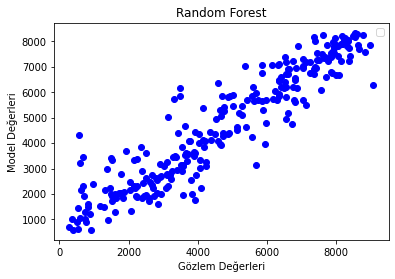

In [ ]:
plt.scatter(y_test,y_pred, color="b")
plt.xlabel("Gözlem Değerleri")
plt.ylabel("Model Değerleri")
plt.title("Random Forest")
plt.legend()
plt.show()

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.9411754846240272

In [ ]:

train_rf = pd.DataFrame(Y_train_rf)
pred_rf = pd.DataFrame(Y_pred_rf)
train_rf_norm = pd.DataFrame(y_train)
test_rf_norm = pd.DataFrame(y_test)

In [ ]:
y_pred

In [ ]:
train_rf.to_excel("/content/drive/MyDrive/train_fr.xlsx")
pred_rf.to_excel("/content/drive/MyDrive/pred_fr.xlsx")
train_rf_norm.to_excel("/content/drive/MyDrive/train_rf_norm.xlsx")
test_rf_norm.to_excel("/content/drive/MyDrive/test_rf_norm.xlsx")

## Tahmin

In [ ]:
len(y_train)


809

In [ ]:
len(y_pred)

270

In [ ]:
len(y_test)


270

In [ ]:
rf_model.predict(X_test)[0:5]

array([5.20100154, 2.67344635, 2.61244264, 8.33215513, 5.96199817])

In [ ]:
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
mape

17.26190909244596

In [ ]:
rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / y_test)), axis=0))*100
rmspe

33.16878417848988

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.8969943519979366

# SVR (Destek Vektör Regresyonu)

In [ ]:
y = data["radiation"]
X = data.drop(["radiation","timestamp"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=200)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR("linear").fit(X_train, y_train)

In [ ]:
svr_model.predict(X_train)[0:5]

array([508.40899977, 105.36307426, 711.69526202, 588.34082349,
       130.90943918])

In [ ]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -173.37313969336387 + 287.7776360650305 x


In [ ]:
y_pred

array([519.67866667,  69.5625    , 679.        , ..., 199.92466667,
       511.        , 532.393     ])

In [ ]:
y_pred = svr_model.predict(X_train)

## Tahmin

In [ ]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -173.37313969336387 + 287.7776360650305 x


In [ ]:
y_pred = svr_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

225.60480601189826

In [ ]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Model Tuning

In [ ]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

1.9000000000000001

In [ ]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)



In [ ]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

225.0120899454198

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

225.0120899454198

# Doğrusal Olmayan SVR

In [ ]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [ ]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

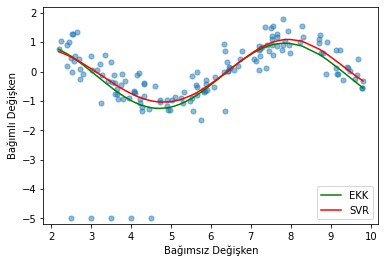

In [ ]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [ ]:
y = data["radiation"]
X = data.drop(["radiation","timestamp"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=200)

In [ ]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = svr_rbf.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

272.24361803155864

## Model Tuning

In [ ]:
svr_rbf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [ ]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)


In [ ]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

241.45693033351304

# Bagged Trees Regresyon

In [ ]:
y = data["radiation"]
X = data.drop(["radiation","timestamp"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=200)


In [ ]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [ ]:
bag_model.n_estimators

10

In [ ]:
bag_model.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1110520726, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2015372460, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_de

In [ ]:
bag_model.estimators_samples_

[array([2158, 7803, 8041, ..., 1487, 4909, 5458]),
 array([4266, 4744, 6170, ..., 4874, 4142, 3102]),
 array([4568, 3727, 8276, ...,  395, 1546, 2347]),
 array([7937, 1179, 3812, ...,  791, 1904, 8051]),
 array([1775, 6840, 7241, ..., 6102, 7620, 1402]),
 array([7596, 7678, 7680, ..., 6451, 1898, 1218]),
 array([2431,  865, 4748, ..., 8008, 4577, 1011]),
 array([8045, 3796, 2211, ..., 2190, 4728,  972]),
 array([3452, 5489,  719, ..., 1145, 3156, 4245]),
 array([1549, 2782, 2565, ..., 7677, 1682, 3575])]

In [ ]:
bag_model.estimators_features_

[array([0, 0, 6, 1, 6, 2, 6]),
 array([1, 6, 6, 4, 6, 4, 2]),
 array([5, 6, 3, 5, 0, 0, 4]),
 array([1, 5, 4, 2, 5, 6, 3]),
 array([4, 2, 2, 5, 0, 1, 1]),
 array([0, 2, 1, 2, 6, 1, 3]),
 array([5, 0, 0, 5, 1, 5, 1]),
 array([3, 1, 1, 0, 4, 6, 6]),
 array([6, 0, 0, 3, 0, 5, 4]),
 array([5, 1, 2, 1, 3, 4, 5])]

In [ ]:
bag_model.estimators_[1]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2015372460, splitter='best')

## Tahmin

In [ ]:
y_pred = bag_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

218.4668007914614

# Model Tuning

In [ ]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [ ]:
bag_params = {"n_estimators": range(2,20)}

In [ ]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [ ]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=True,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': range(2, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
bag_cv_model.best_params_

{'n_estimators': 19}

In [ ]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state = 45)

In [ ]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=14,
                 n_jobs=None, oob_score=False, random_state=45, verbose=0,
                 warm_start=False)

In [ ]:
y_pred = bag_tuned.predict(X_test)

# Gradient Boosting Machines

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Tahmin

In [ ]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))/y_test*100

NameError: ignored

## Model Tuning

In [ ]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [ ]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

NameError: ignored

In [ ]:
gbm_cv_model.best_params_

NameError: ignored

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [ ]:
y = data["radiation"]
X = data.drop(["radiation","timestamp"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=200)


# Light GBM

In [ ]:
y = data["radiation"]
X = data.drop(["radiation","timestamp"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=200)


In [ ]:
#!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
#conda install -c conda-forge lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
lgbm_model

In [ ]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# CatBoost

In [ ]:
y = data["radiation"]
X = data.drop(["radiation","timestamp"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=200)

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [ ]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))